# **Analísis de tiendas**


✨ Introducción al desafío: Evaluación estratégica para Alura Store


En un contexto de expansión y emprendimiento, el Sr. Juan enfrenta una decisión crucial para el futuro de su cadena de tiendas. Con planes para lanzar un nuevo proyecto, necesita determinar cuál de sus cuatro tiendas actuales sería la mejor candidata para vender y así liberar recursos que impulsen su nueva iniciativa.


   Este problema se aborda desde un enfoque analítico, combinando datos de:

📈 **Facturación total de cada tienda**

⭐ **Categorias mas populares**

🚚 **Promedio de calificación de los clientes**

🛒 **Productos mas y menos vendidos**

📉 **Costo promedio de envio**


El objetivo es aplicar un criterio objetivo y fundamentado en datos para identificar la tienda menos eficiente, considerando rentabilidad, percepción del cliente y capacidad logística. Así, la recomendación final estará alineada con el crecimiento sostenible y la optimización de recursos del Sr. Juan.


## Importación de Datos


In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
# Conocer que nombre de columnas hay
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

## Analisis de Facturación

In [ ]:
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [4]:
ingreso_total1 = tienda['Precio'].sum()
ingreso_total2 = tienda2['Precio'].sum()
ingreso_total3 = tienda3['Precio'].sum()
ingreso_total4 = tienda4['Precio'].sum()

print(f"Ingreso total tienda 1: {ingreso_total1}")
print(f"Ingreso total tienda 2: {ingreso_total2}")
print(f"Ingreso total tienda 3: {ingreso_total3}")
print(f"Ingreso total tienda 4: {ingreso_total4}")

Ingreso total tienda 1: 1150880400.0
Ingreso total tienda 2: 1116343500.0
Ingreso total tienda 3: 1098019600.0
Ingreso total tienda 4: 1038375700.0


In [5]:
# Tienda con mayor ingreso
ingresos = {
    'Tienda 1': ingreso_total1,
    'Tienda 2': ingreso_total2,
    'Tienda 3': ingreso_total3,
    'Tienda 4': ingreso_total4
}

tienda_mayor_ingreso = max(ingresos, key=ingresos.get)
print(f"La tienda con mayor ingreso es: {tienda_mayor_ingreso}")

La tienda con mayor ingreso es: Tienda 1


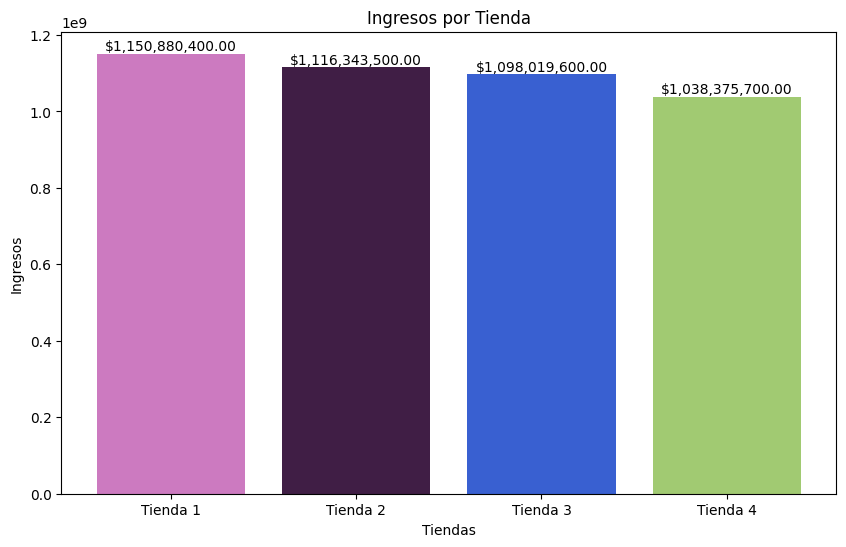

In [6]:
import matplotlib.pyplot as plt
import random

fig, ax = plt.subplots(figsize=(10, 6))
colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in ingresos.keys()]
bars = ax.bar(ingresos.keys(), ingresos.values(), color = colors)


for graf, in zip(bars):
    yval = graf.get_height()
    ax.text(graf.get_x() + graf.get_width() / 2, yval, f"${yval:,.2f}", ha="center", va="bottom")

ax.set_xlabel('Tiendas')
ax.set_ylabel('Ingresos')
ax.set_title('Ingresos por Tienda')

plt.show()



## Ventas por categoria

Cantidad de ventas por categoría tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Cantidad de ventas por categoría tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Cantidad de ventas por categoría tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name

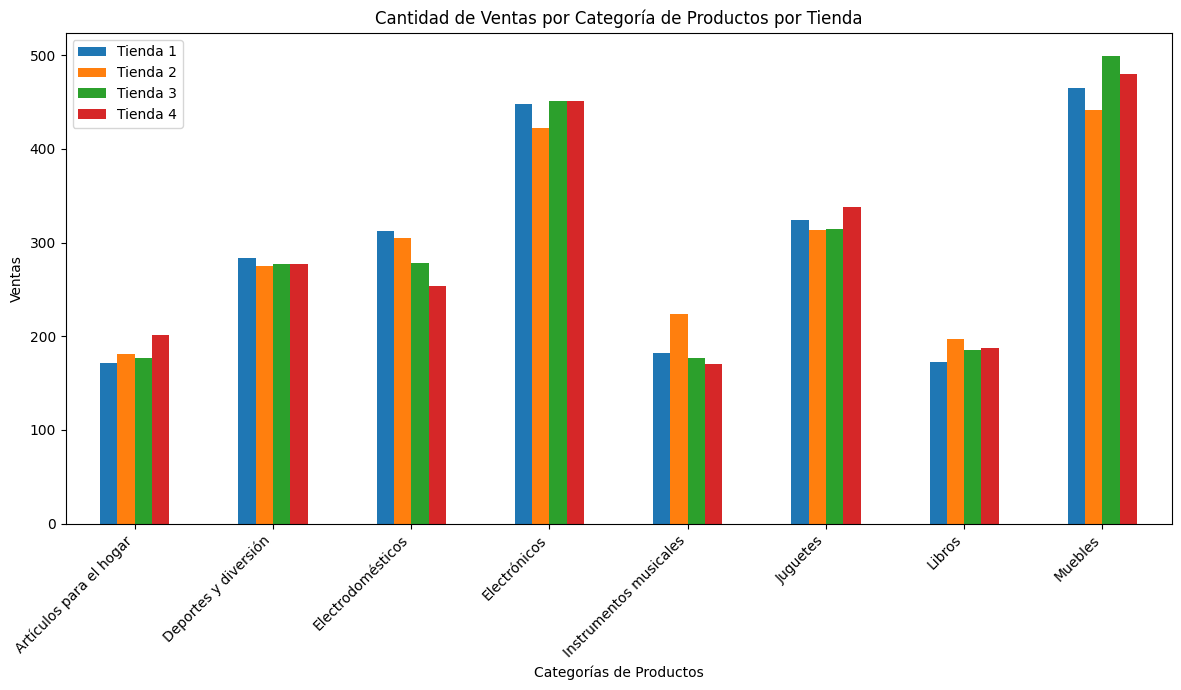

In [ ]:
import matplotlib.pyplot as plt
import random
import pandas as pd

ventas_por_categoria1 = tienda['Categoría del Producto'].value_counts()
ventas_por_categoria2 = tienda2['Categoría del Producto'].value_counts()
ventas_por_categoria3 = tienda3['Categoría del Producto'].value_counts()
ventas_por_categoria4 = tienda4['Categoría del Producto'].value_counts()


print(f"Cantidad de ventas por categoría tienda 1:\n{ventas_por_categoria1}\n")
print(f"Cantidad de ventas por categoría tienda 2:\n{ventas_por_categoria2}\n")
print(f"Cantidad de ventas por categoría tienda 3:\n{ventas_por_categoria3}\n")
print(f"Cantidad de v entas por categoría tienda 4:\n{ventas_por_categoria4}\n")

# Combine the sales data into a single DataFrame
ventas_categorias_df = pd.DataFrame({
    'Tienda 1': ventas_por_categoria1,
    'Tienda 2': ventas_por_categoria2,
    'Tienda 3': ventas_por_categoria3,
    'Tienda 4': ventas_por_categoria4
}).fillna(0) # Fill any missing categories with 0

# Plotting the grouped bar chart
ax = ventas_categorias_df.plot(kind='bar', figsize=(12, 7))

ax.set_xlabel('Categorías de Productos')
ax.set_ylabel('Ventas')
ax.set_title('Cantidad de Ventas por Categoría de Productos por Tienda')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

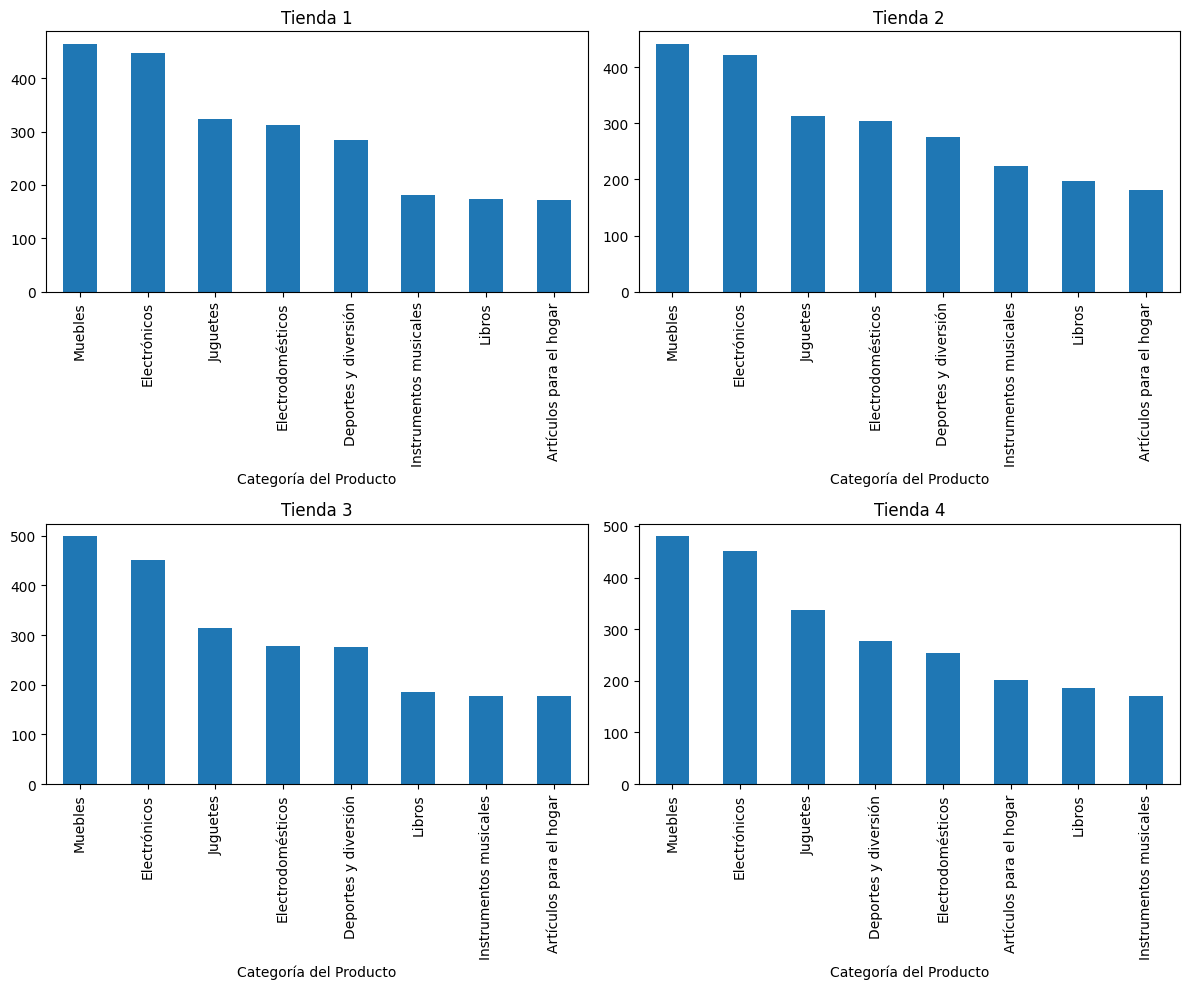

In [ ]:
# Graficar las ventas por categoría para cada tienda individualmente
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

ventas_por_categoria1.plot(kind='bar', ax=axes[0, 0], title='Tienda 1')
ventas_por_categoria2.plot(kind='bar', ax=axes[0, 1], title='Tienda 2')
ventas_por_categoria3.plot(kind='bar', ax=axes[1, 0], title='Tienda 3')
ventas_por_categoria4.plot(kind='bar', ax=axes[1, 1], title='Tienda 4')

plt.tight_layout()
plt.show()

In [ ]:
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Ventas totales por categoría tienda 1:
    Categoría del Producto       Precio
0  Artículos para el hogar   12698400.0
1     Deportes y diversión   39290000.0
2        Electrodomésticos  363685200.0
3             Electrónicos  429493500.0
4   Instrumentos musicales   91299000.0
5                 Juguetes   17995700.0
6                   Libros    8784900.0
7                  Muebles  187633700.0

Ventas totales por categoría tienda 2:
    Categoría del Producto       Precio
0  Artículos para el hogar   14746900.0
1     Deportes y diversión   34744500.0
2        Electrodomésticos  348567800.0
3             Electrónicos  410831100.0
4   Instrumentos musicales  104990300.0
5                 Juguetes   15945400.0
6                   Libros   10091200.0
7                  Muebles  176426300.0

Ventas totales por categoría tienda 3:
    Categoría del Producto       Precio
0  Artículos para el hogar   15060000.0
1     Deportes y diversión   35593100.0
2        Electrodomésticos  329237900.0
3

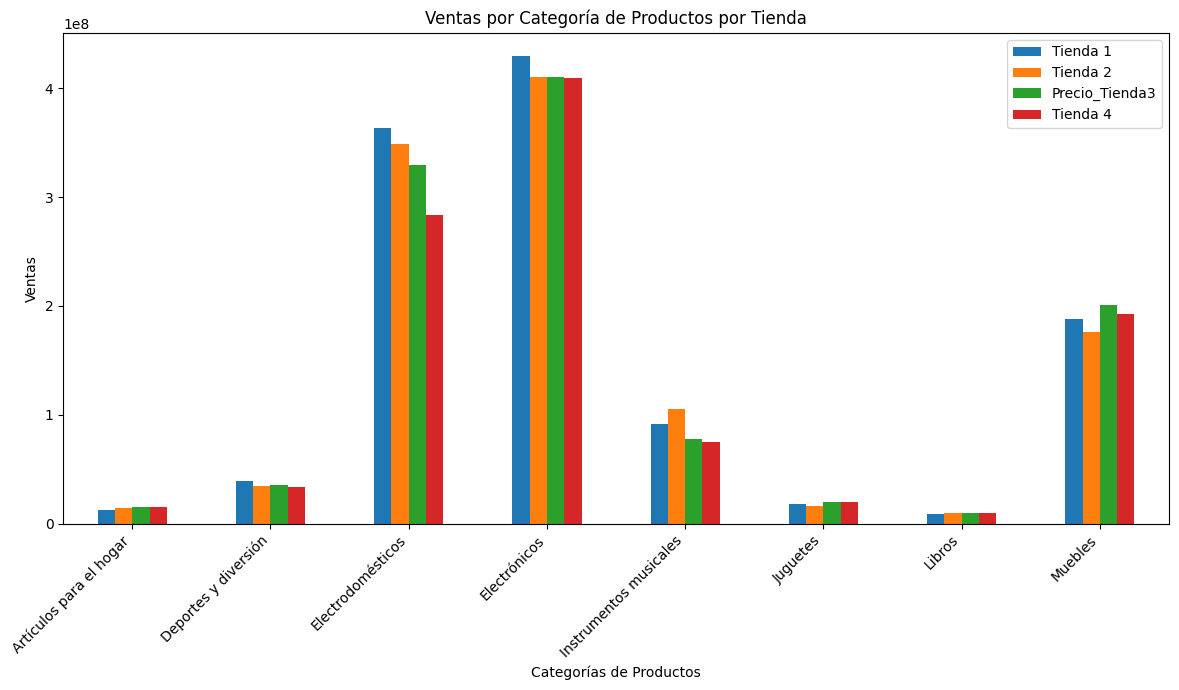

In [ ]:
ventas_totales_por_categoria1 = tienda.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_totales_por_categoria2 = tienda2.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_totales_por_categoria3 = tienda3.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_totales_por_categoria4 = tienda4.groupby('Categoría del Producto')['Precio'].sum().reset_index()

print(f"Ventas totales por categoría tienda 1:\n{ventas_totales_por_categoria1}\n")
print(f"Ventas totales por categoría tienda 2:\n{ventas_totales_por_categoria2}\n")
print(f"Ventas totales por categoría tienda 3:\n{ventas_totales_por_categoria3}\n")
print(f"Ventas totales por categoría tienda 4:\n{ventas_totales_por_categoria4}\n")


ventas_totales_categorias_df = ventas_totales_por_categoria1.merge(ventas_totales_por_categoria2, on='Categoría del Producto', suffixes=('_Tienda1', '_Tienda2'))
ventas_totales_categorias_df = ventas_totales_categorias_df.merge(ventas_totales_por_categoria3, on='Categoría del Producto', suffixes=('', '_Tienda3'))
ventas_totales_categorias_df = ventas_totales_categorias_df.merge(ventas_totales_por_categoria4, on='Categoría del Producto', suffixes=('_Tienda3', '_Tienda4'))


ventas_totales_categorias_df = ventas_totales_categorias_df.rename(columns={'Precio_Tienda1': 'Tienda 1',
                                                                            'Precio_Tienda2': 'Tienda 2',
                                                                            'Precio': 'Tienda 3', # This column was not suffixed in the previous merge
                                                                            'Precio_Tienda4': 'Tienda 4'})



ventas_totales_categorias_df = ventas_totales_categorias_df.set_index('Categoría del Producto')


ax = ventas_totales_categorias_df.plot(kind='bar', figsize=(12, 7))

ax.set_xlabel('Categorías de Productos')
ax.set_ylabel('Ventas')
ax.set_title('Ventas por Categoría de Productos por Tienda')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

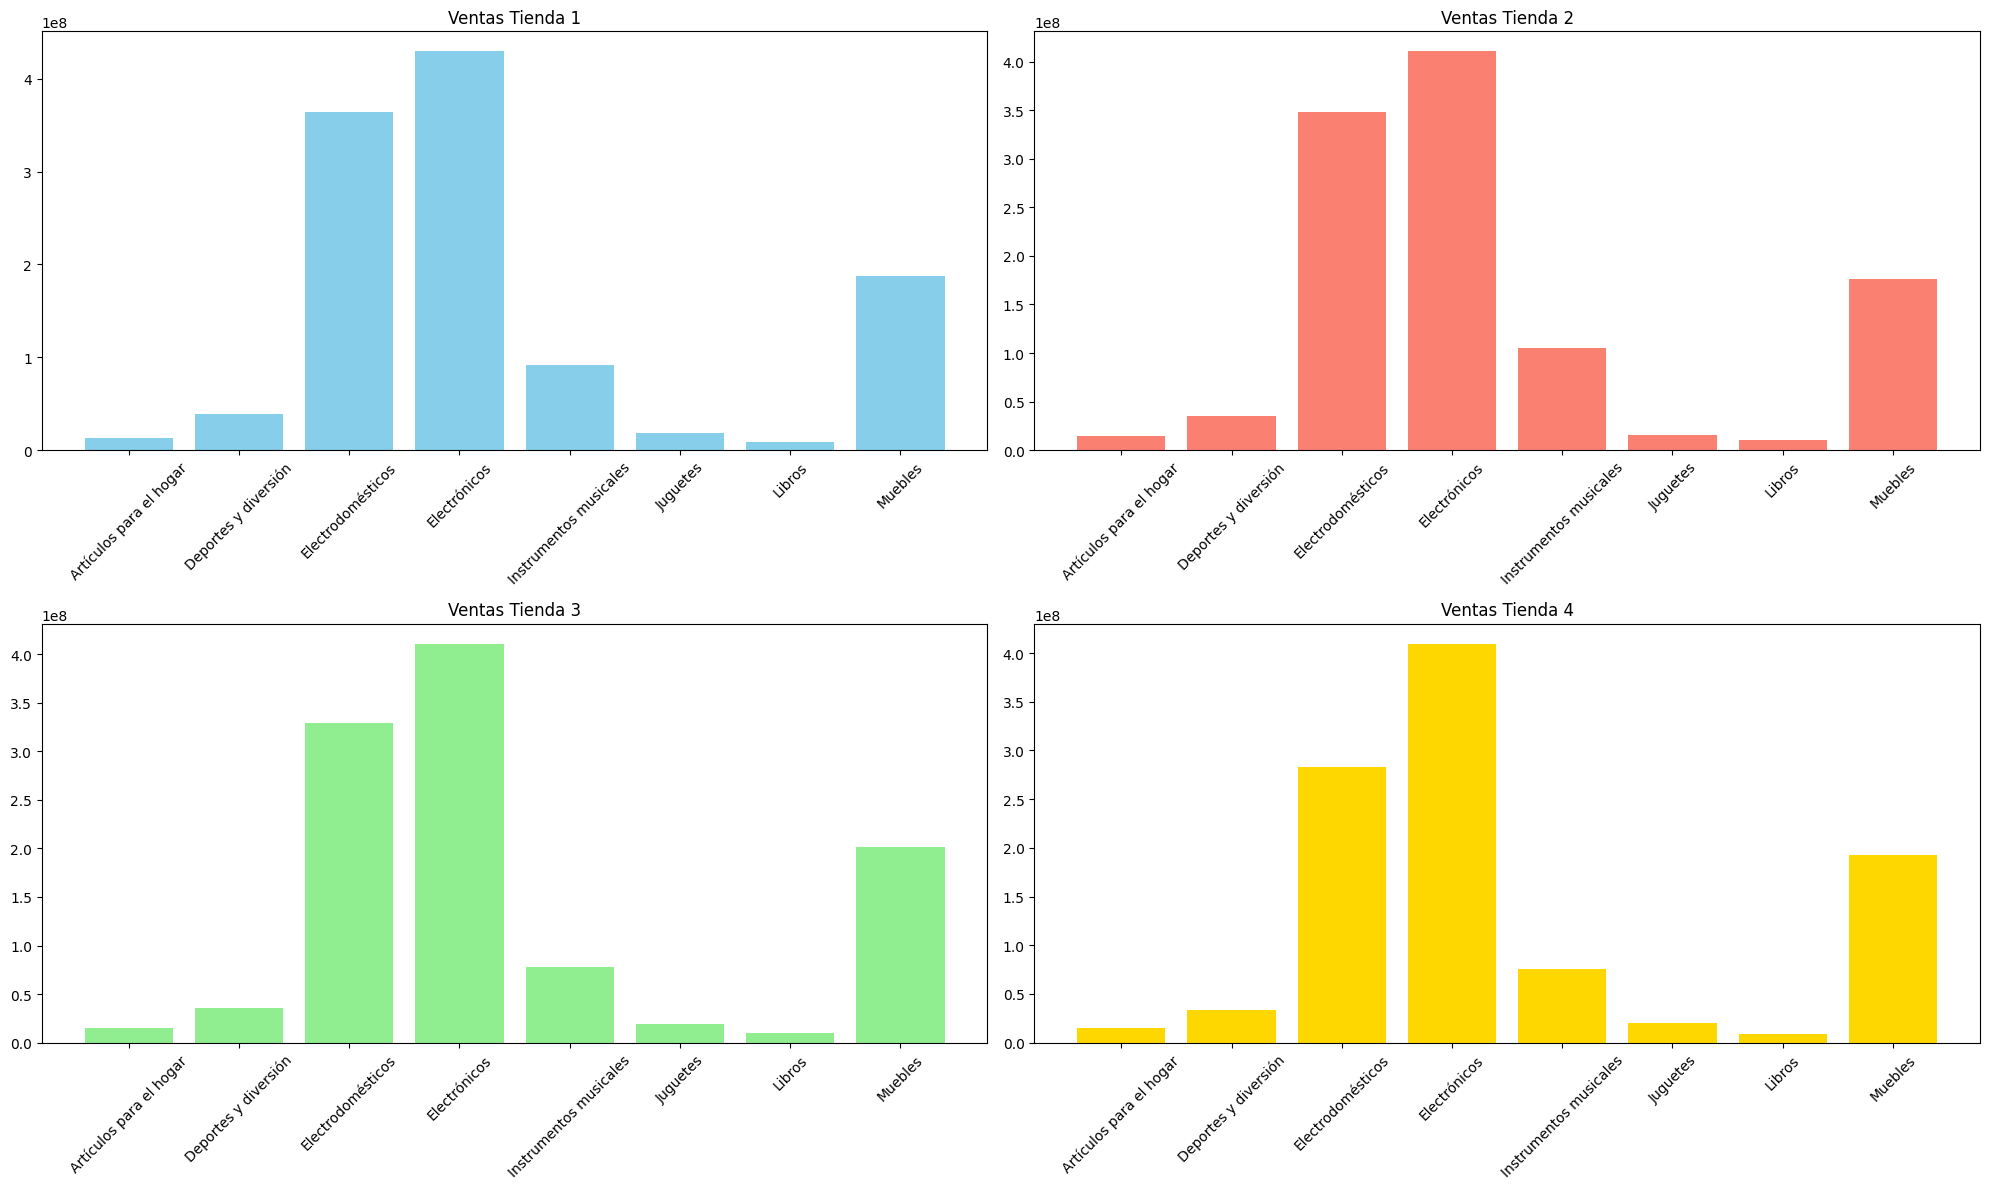

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

axes[0, 0].bar(ventas_totales_por_categoria1['Categoría del Producto'], ventas_totales_por_categoria1['Precio'], color='skyblue')
axes[0, 0].set_title('Ventas Tienda 1')
axes[0, 0].tick_params(axis='x', rotation=45)

axes[0, 1].bar(ventas_totales_por_categoria2['Categoría del Producto'], ventas_totales_por_categoria2['Precio'], color='salmon')
axes[0, 1].set_title('Ventas Tienda 2')
axes[0, 1].tick_params(axis='x', rotation=45)

axes[1, 0].bar(ventas_totales_por_categoria3['Categoría del Producto'], ventas_totales_por_categoria3['Precio'], color='lightgreen')
axes[1, 0].set_title('Ventas Tienda 3')
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].bar(ventas_totales_por_categoria4['Categoría del Producto'], ventas_totales_por_categoria4['Precio'], color='gold')
axes[1, 1].set_title('Ventas Tienda 4')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Calificación Promedio por Tienda


In [ ]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

Calificación promedio tienda 1: 3.976685036032217
Calificación promedio tienda 2: 4.037303942348453
Calificación promedio tienda 3: 4.048325561678677
Calificación promedio tienda 4: 3.9957591178965224


(3.5, 4.5)

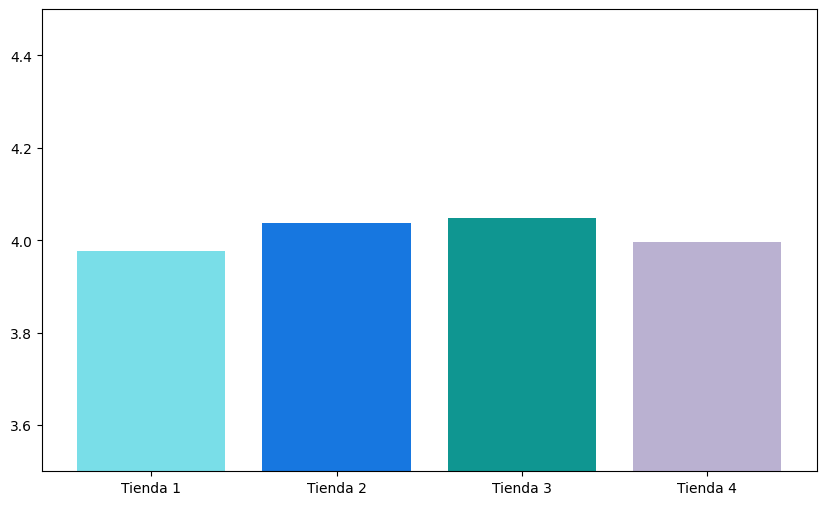

In [10]:
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

print(f"Calificación promedio tienda 1: {calificacion_promedio_tienda1}")
print(f"Calificación promedio tienda 2: {calificacion_promedio_tienda2}")
print(f"Calificación promedio tienda 3: {calificacion_promedio_tienda3}")
print(f"Calificación promedio tienda 4: {calificacion_promedio_tienda4}")

calificaiones_promedios = {
    'Tienda 1': calificacion_promedio_tienda1,
    'Tienda 2': calificacion_promedio_tienda2,
    'Tienda 3': calificacion_promedio_tienda3,
    'Tienda 4': calificacion_promedio_tienda4
}


fig, ax = plt.subplots(figsize=(10, 6))
colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in calificaiones_promedios.keys()]
bars = ax.bar(calificaiones_promedios.keys(), calificaiones_promedios.values(), color = colors)
ax.set_ylim(3.5, 4.5)

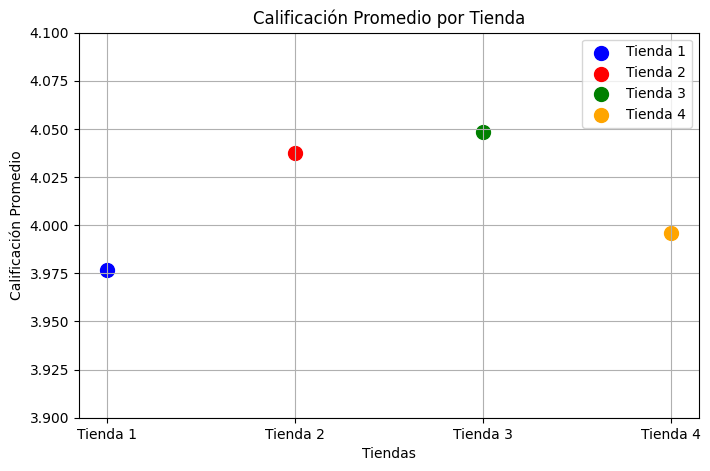

In [ ]:
tiendas = list(calificaiones_promedios.keys())
calificaciones = list(calificaiones_promedios.values())
colores = ['blue', 'red', 'green', 'orange']


plt.figure(figsize=(8, 5))

for i in range(len(tiendas)):
    plt.scatter(tiendas[i], calificaciones[i], color=colores[i], label=tiendas[i], s=100)  #

plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')
plt.ylim(3.9, 4.1)
plt.legend()

plt.show()

## Productos mas y menos vendidos

In [ ]:
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

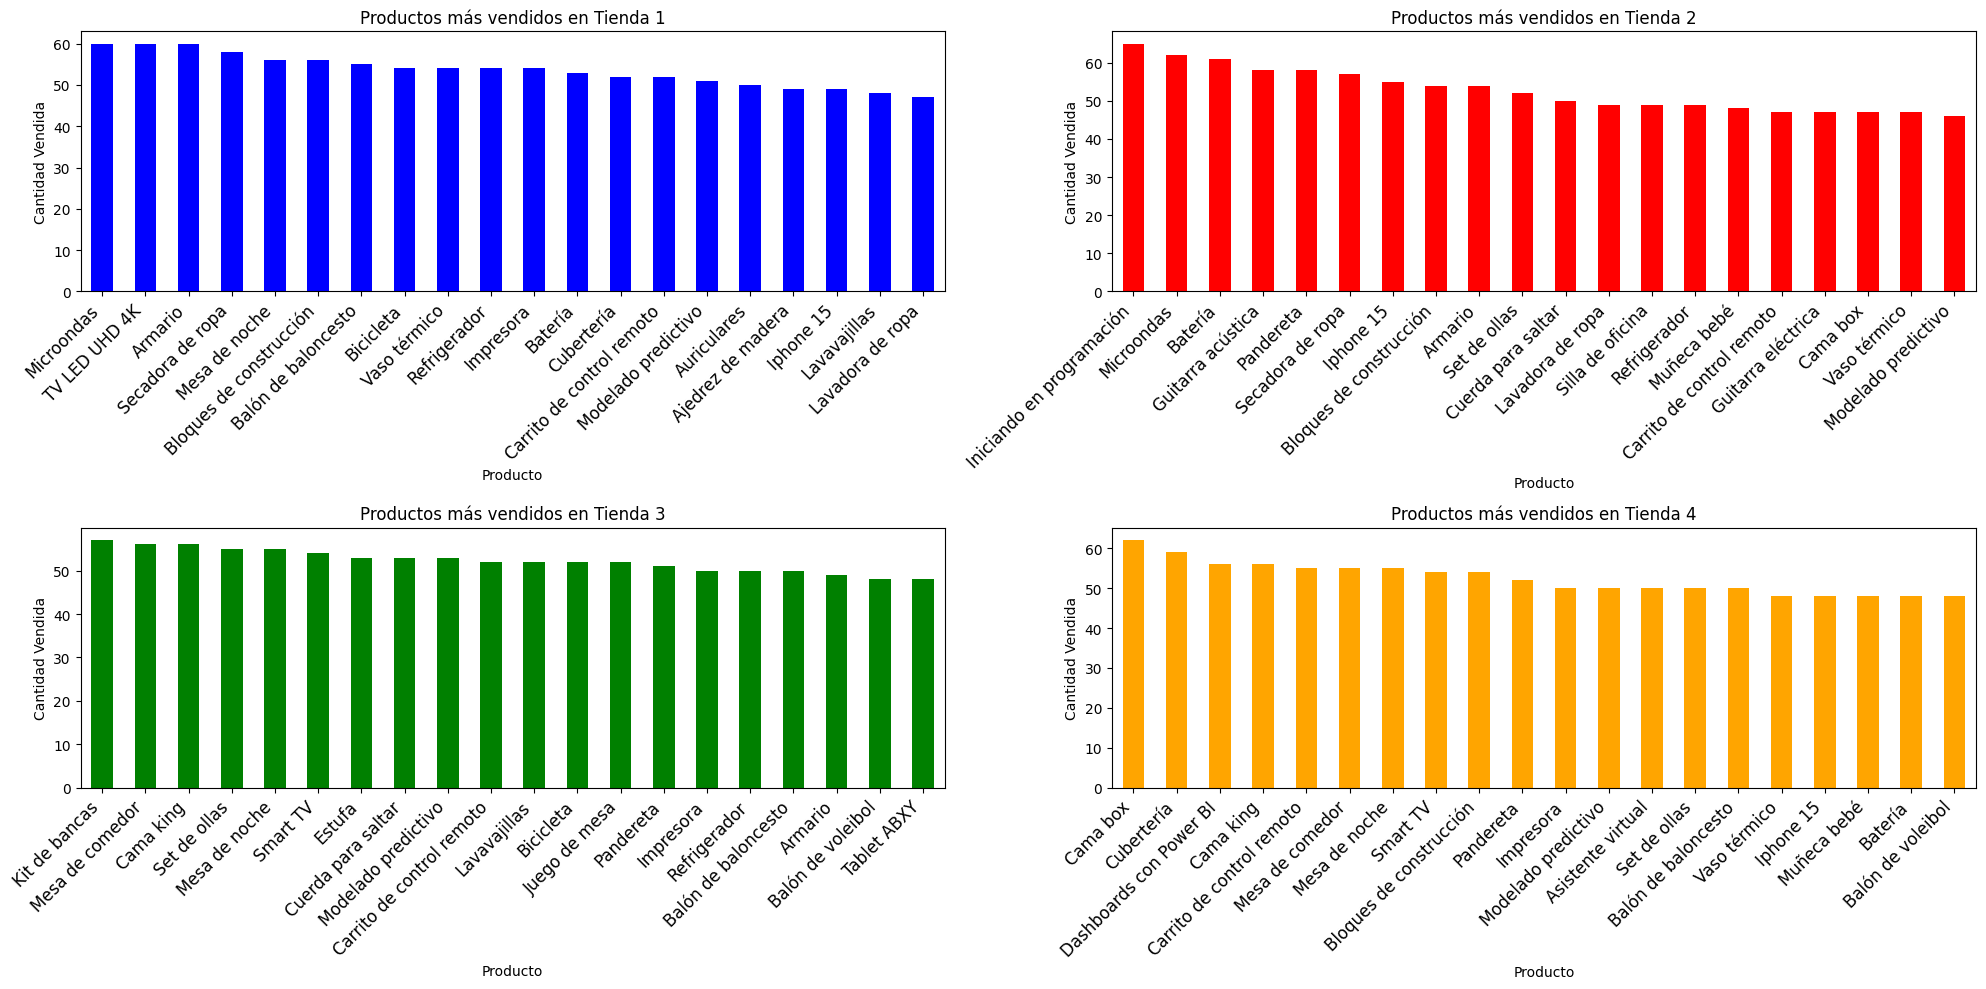

In [ ]:
productos_tienda1 = tienda["Producto"].value_counts()
productos_tienda2 = tienda2["Producto"].value_counts()
productos_tienda3 = tienda3["Producto"].value_counts()
productos_tienda4 = tienda4["Producto"].value_counts()


productos = {
    'Tienda 1': productos_tienda1,
    'Tienda 2': productos_tienda2,
    'Tienda 3': productos_tienda3,
    'Tienda 4': productos_tienda4
}
import matplotlib.pyplot as plt

# Crear gráficos de barras para cada tienda
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Colores diferentes para cada tienda
colores = ['blue', 'red', 'green', 'orange']

for i, (tiendas, productos_tienda) in enumerate(productos.items()):
    ax = axes[i // 2, i % 2]

    # Asegurarse de que `productos_tienda` es una Serie y convertirla en DataFrame para evitar el problema
    productos_tienda = productos_tienda.sort_values(ascending=False).head(20)

    # Graficar
    productos_tienda.plot(kind='bar', ax=ax, color=colores[i])
    ax.set_title(f'Productos más vendidos en {tiendas}')
    ax.set_xlabel('Producto')
    ax.set_ylabel('Cantidad Vendida')
    ax.tick_params(axis='x', rotation=45)

    ax.tick_params(axis='x', rotation=45, labelsize=12)  # Reducir rotación y aumentar tamaño
    ax.set_xticklabels(productos_tienda.index, ha='right')  # Alinear etiquetas a la derecha


# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()



In [ ]:
tienda.tail()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111
2358,Smartwatch,Electrónicos,195000.0,8600.0,18/06/2022,Felipe Santos,Cali,4,Tarjeta de crédito,1,3.43722,-76.52250


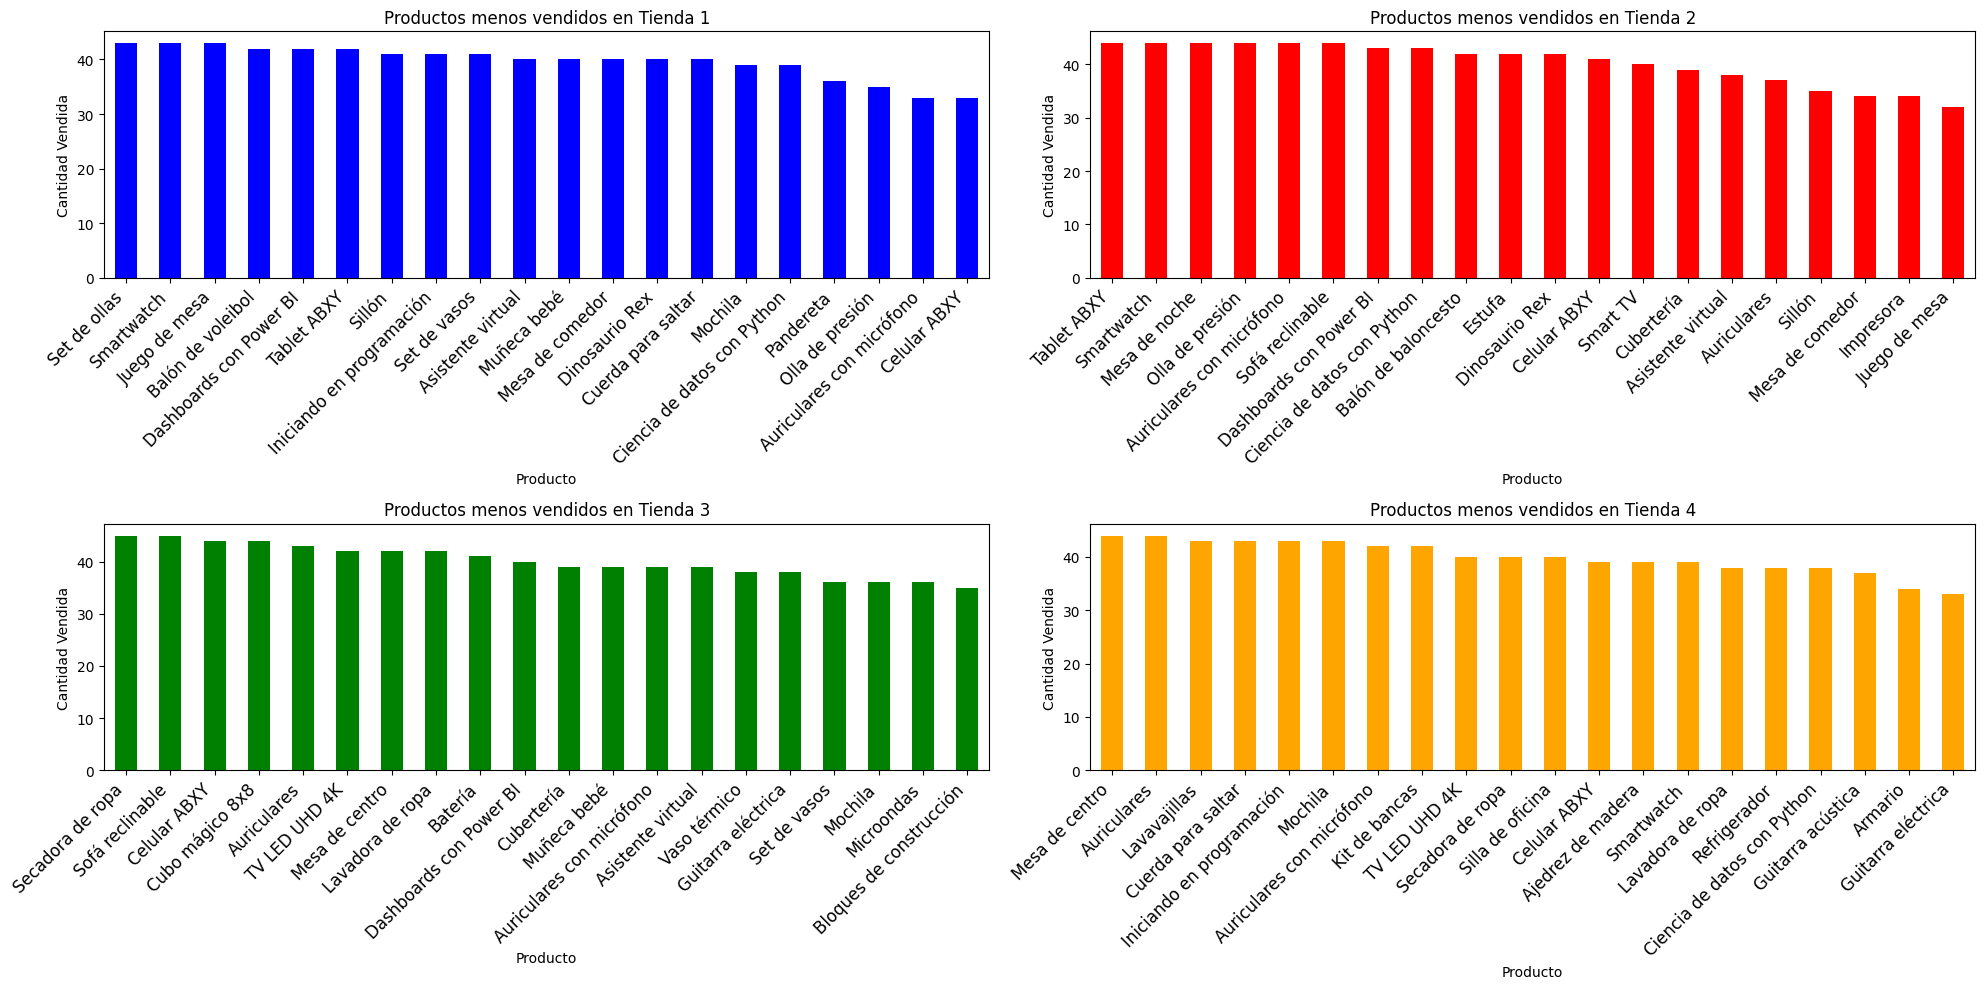

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Colores diferentes para cada tienda
colores = ['blue', 'red', 'green', 'orange']

for i, (tiendas, productos_tienda) in enumerate(productos.items()):
    ax = axes[i // 2, i % 2]

    # Asegurarse de que `productos_tienda` es una Serie y convertirla en DataFrame para evitar el problema
    productos_tienda = productos_tienda.sort_values(ascending=False).tail(20)

    # Graficar
    productos_tienda.plot(kind='bar', ax=ax, color=colores[i])
    ax.set_title(f'Productos menos vendidos en {tiendas}')
    ax.set_xlabel('Producto')
    ax.set_ylabel('Cantidad Vendida')
    ax.tick_params(axis='x', rotation=45)

    # Ajustar etiquetas
    ax.tick_params(axis='x', rotation=45, labelsize=12)  # Reducir rotación y aumentar tamaño
    ax.set_xticklabels(productos_tienda.index, ha='right')  # Alinear etiquetas a la derecha

# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()

## Costo promedio de envio por tienda

In [ ]:
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Costo promedio de envío tienda 1: 26018.60958033065
Costo promedio de envío tienda 2: 25216.235693090293
Costo promedio de envío tienda 3: 24805.680373039424
Costo promedio de envío tienda 4: 23459.457167090754


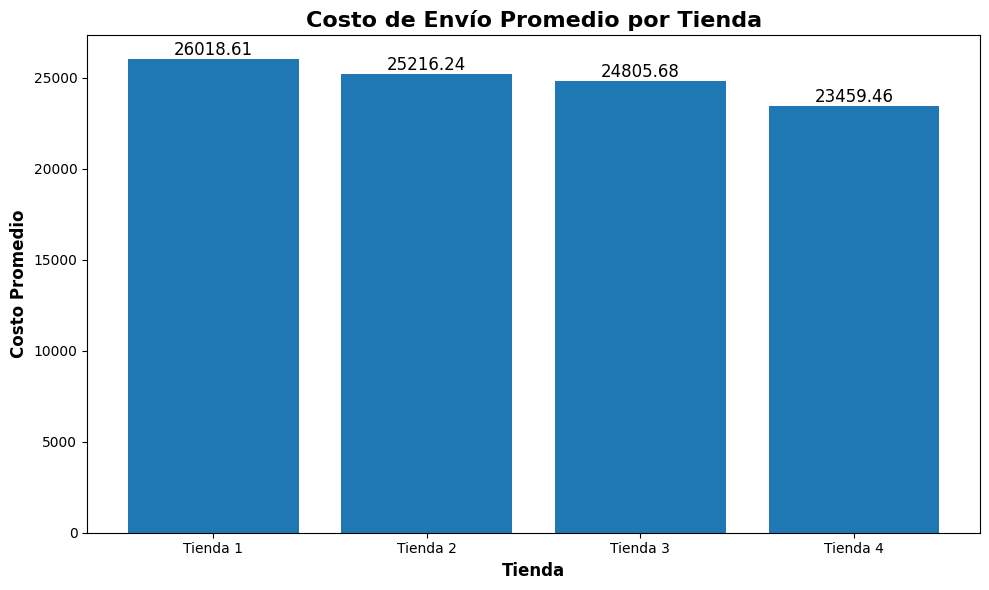

In [ ]:
prom_envio_tienda1 = tienda['Costo de envío'].mean()
prom_envio_tienda2 = tienda2['Costo de envío'].mean()
prom_envio_tienda3 = tienda3['Costo de envío'].mean()
prom_envio_tienda4 = tienda4['Costo de envío'].mean()

print(f"Costo promedio de envío tienda 1: {prom_envio_tienda1}")
print(f"Costo promedio de envío tienda 2: {prom_envio_tienda2}")
print(f"Costo promedio de envío tienda 3: {prom_envio_tienda3}")
print(f"Costo promedio de envío tienda 4: {prom_envio_tienda4}")


promedio_envios = {
    'Tienda 1': prom_envio_tienda1,
    'Tienda 2': prom_envio_tienda2,
    'Tienda 3': prom_envio_tienda3,
    'Tienda 4': prom_envio_tienda4
}

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(promedio_envios.keys(), promedio_envios.values())

# Añadir títulos y etiquetas
plt.title('Costo de Envío Promedio por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12, fontweight='bold')
plt.ylabel('Costo Promedio', fontsize=12, fontweight='bold')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# **Conclusiones**

🧠**Análisis estratégico**  
Para apoyar al Sr. Juan en su decisión, se elaboro este notebook que ofrece una serie de indicadores clave que permiten comparar el desempeño de las 4 tiendas. Basándose en los gráficos y cálculos realizados, se llega a la siguiente conclusión
---

### 📊 **Resumen de indicadores por tienda**

| Indicador                    | Tienda 1         | Tienda 2         | Tienda 3         | Tienda 4         |
|-----------------------------|------------------|------------------|------------------|------------------|
| **Facturación total**       |  **1 millón 150 mil** | 1 millón 116 mil  | 1 millóm 98 mil   | 1 millón 38 mil |
| **Calificación promedio**   | 4.04             | **4.08**         | 4.03             | **3.98**          |
| **Costo de envío promedio**| 26,018         | 25,216          | 24,805       | 23,459           |
| **Variedad de ventas**      | Amplia           | Moderada         | Amplia           | **Limitada**     |
| **Productos menos vendidos**| Equilibrado      | Equilibrado      | Variado          | **Concentrado**  |

---

### 🔍 **Hallazgos clave**

- **Tienda 4** es consistentemente la de peor desempeño:
  - Tiene **la facturación más baja**, lo que afecta directamente el retorno de inversión.
  - Su **calificación promedio** es la más baja, lo que podría reflejar problemas de experiencia del cliente o calidad del servicio.
  - Aunque su **costo de envío** no es el más alto, tampoco es competitivo frente a la Tienda 1.
  - Las gráficas muestran **menor diversidad de categorías** y una concentración en productos menos vendidos.

---

### ✅ **Recomendación final**

📉 Basado en estos indicadores, se recomienda **vender la Tienda 4**. Su bajo rendimiento en ingresos, percepción del cliente y diversidad de productos sugiere que no es competitiva frente a las demás. Al deshacerse de esta tienda, el Sr. Juan podría liberar recursos para invertir en su nuevo emprendimiento con mejor potencial de rentabilidad.

